# Algorithmic Differentiation Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot(np.linspace(-4*np.pi,4*np.pi,100),np.sin(np.linspace(-4*np.pi,4*np.pi,100)))

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# from torchvision import datasets
# from torchvision.transforms import ToTensor

from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter

In [7]:
class DenseModel(nn.Module):

    def __init__(self, num_inputs):
        super(DenseModel, self).__init__()
        
        self.layer1 = nn.Linear(num_inputs, 64, dtype=torch.float64)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 64, dtype=torch.float64)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 64, dtype=torch.float64)
        self.activation3 = nn.ReLU()
        self.layer4 = nn.Linear(64, 1, dtype=torch.float64)
        

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        x = self.layer4(x)
        return x

In [8]:
class DiffDeepLearning(nn.Module):
    def __init__(self, model):
        super(DiffDeepLearning, self).__init__()
        
        self.model = model

    def forward(self, x):

        y = self.model(x)
        grad = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y))[0]

        return torch.concatenate([y, grad], dim=1)


tensor([[ 0.0647,  0.0091,  0.0243,  0.0050,  0.0038, -0.0154],
        [ 0.0661,  0.0047,  0.0106,  0.0001,  0.0165, -0.0146],
        [ 0.0514,  0.0069, -0.0004,  0.0020,  0.0188, -0.0172],
        [ 0.0631, -0.0081,  0.0160,  0.0036, -0.0131, -0.0192],
        [ 0.0730,  0.0069, -0.0014, -0.0175,  0.0079, -0.0005],
        [ 0.0652, -0.0064,  0.0152,  0.0078, -0.0093, -0.0194],
        [ 0.0628,  0.0208,  0.0045, -0.0171,  0.0233,  0.0049],
        [ 0.0705, -0.0029,  0.0068, -0.0062, -0.0015, -0.0079],
        [ 0.0581,  0.0230, -0.0077, -0.0015,  0.0145, -0.0138],
        [ 0.0691,  0.0030,  0.0092,  0.0068,  0.0005, -0.0167]],
       dtype=torch.float64, grad_fn=<CatBackward0>)
tensor([-0.0154, -0.0146, -0.0172, -0.0192, -0.0005, -0.0194,  0.0049, -0.0079,
        -0.0138, -0.0167], dtype=torch.float64, grad_fn=<DivBackward0>)


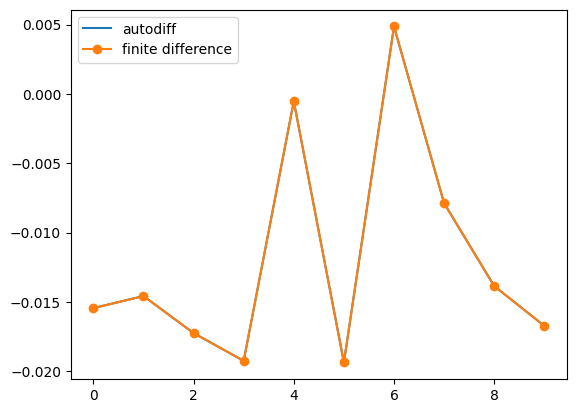

In [9]:
model = DenseModel(num_inputs=5)

algdiffmodel = DiffDeepLearning(model)

x = torch.rand(10, 5, dtype=torch.float64, requires_grad=True)

y = algdiffmodel(x)

print(y)

col = 4
ep = 1e-6

x__ = x.clone()

x__[:, col] += torch.tensor(ep)

y2 = algdiffmodel(x__)

test = (y2[:, 0] - y[:, 0]) / ep

print(test)

plt.plot(y[:,col+1].detach().numpy(), label='autodiff')

plt.plot(test.detach().numpy(), label='finite difference', marker='o')

plt.legend()


In [10]:

print(algdiffmodel)


DiffDeepLearning(
  (model): DenseModel(
    (layer1): Linear(in_features=5, out_features=64, bias=True)
    (activation1): ReLU()
    (layer2): Linear(in_features=64, out_features=64, bias=True)
    (activation2): ReLU()
    (layer3): Linear(in_features=64, out_features=64, bias=True)
    (activation3): ReLU()
    (layer4): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [ ]:
class DiffLearningFullModel:

    def __init__(self, model, loss_fn, optimizer, train_dataloader, val_dataloader = None):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_dataloader = train_dataloader
        self.val_dataloader = val_dataloader

    def compute_normalization_params(self):

    def train(self, epochs, writer=None):
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0.0
            for batch, (X, y) in enumerate(self.train_dataloader):
                X = X.requires_grad_(True)
                pred = self.model(X)
                loss = self.loss_fn(pred, y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
            train_loss /= len(self.train_dataloader)

            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X, y in self.val_dataloader:
                    X = X.requires_grad_(True)
                    pred = self.model(X)
                    loss = self.loss_fn(pred, y)
                    val_loss += loss.item()
            val_loss /= len(self.val_dataloader)

            if writer:
                writer.add_scalar('Loss/train', train_loss, epoch)
                writer.add_scalar('Loss/val', val_loss, epoch)

            print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

In [11]:
X = torch.rand(100, 5, dtype=torch.float64)

In [ ]:
X.mean(dim=0)


tensor([0.5003, 0.5422, 0.5133, 0.5363, 0.4733], dtype=torch.float64)